<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/weather_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
# 데이터 준비
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"]
df = pd.read_csv("/content/sample_data/weather.csv", header=None, names=cols).dropna()
df  # print(df) 와 동일

,,,,,,,,,,,,,,,,,,,sepal_length,sepal_width,petal_length,petal_width,label
Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
11/1/2007,Canberra,8,24.3,0,3.4,6.3,NW,30,SW,NW,6,20,68,29,1019.7,1015,7,7,14.4,23.6,No,3.6,Yes
11/2/2007,Canberra,14,26.9,3.6,4.4,9.7,ENE,39,E,W,4,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85,N,NNE,6,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54,WNW,W,30,24,62,56,1005.5,1007,2,7,13.5,14.1,Yes,2.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/27/2008,Canberra,9,30.7,0,7.6,12.1,NNW,76,SSE,NW,7,50,38,15,1016.1,1010.8,1,3,20.4,30,No,0,No
10/28/2008,Canberra,7.1,28.4,0,11.6,12.7,N,48,NNW,NNW,2,19,45,22,1020,1016.9,0,1,17.2,28.2,No,0,No
10/29/2008,Canberra,12.5,19.9,0,8.4,5.3,ESE,43,ENE,ENE,11,9,63,47,1024,1022.8,3,2,14.5,18.3,No,0,No
10/30/2008,Canberra,12.5,26.9,0,5,7.1,NW,46,SSW,WNW,6,28,69,39,1021,1016.2,6,7,15.8,25.9,No,0,No


In [16]:
#레이블 불균형 확인

df['label'].value_counts()

,count
label,
No,300
Yes,66
RainTomorrow,1


Text(0.5, 1.0, 'Label')

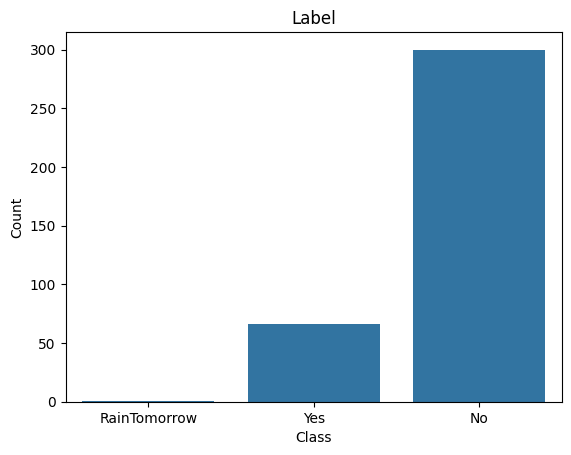

In [17]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="label")
plt.xlabel("Class")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("Label")

In [18]:
# 결측치 확인
df.isnull().sum()
# 결측치 제거
df = df.dropna()
df.isnull().sum()
#--
# df.dropna() 코드는 데이터프레임 df 내에서 결측치(NaN)가 포함된 모든 행을 삭제하는 역할
# df = df.dropna()는 결측치가 제거된 새로운 데이터프레임을 다시 df 변수에 할당하여, 결측치가 없는 데이터로 갱신
#--
df.columns  # 컬럼명 확인

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'], dtype='object')

In [19]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [20]:
df

X = df.drop(columns=["label"])
y = df["label"]

X # 분리 후 확인
y # 분리 후 확인

,,,,,,,,,,,,,,,,,,,label
Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,1
11/1/2007,Canberra,8,24.3,0,3.4,6.3,NW,30,SW,NW,6,20,68,29,1019.7,1015,7,7,2
11/2/2007,Canberra,14,26.9,3.6,4.4,9.7,ENE,39,E,W,4,17,80,36,1012.4,1008.4,5,3,2
11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85,N,NNE,6,6,82,69,1009.5,1007.2,8,7,2
11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54,WNW,W,30,24,62,56,1005.5,1007,2,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/27/2008,Canberra,9,30.7,0,7.6,12.1,NNW,76,SSE,NW,7,50,38,15,1016.1,1010.8,1,3,0
10/28/2008,Canberra,7.1,28.4,0,11.6,12.7,N,48,NNW,NNW,2,19,45,22,1020,1016.9,0,1,0
10/29/2008,Canberra,12.5,19.9,0,8.4,5.3,ESE,43,ENE,ENE,11,9,63,47,1024,1022.8,3,2,0
10/30/2008,Canberra,12.5,26.9,0,5,7.1,NW,46,SSW,WNW,6,28,69,39,1021,1016.2,6,7,0


In [21]:
# 데이터셋 분리
df = df[df['label'] != label_encoders['label'].transform(['RainTomorrow'])[0]]

X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)

X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((292, 4), (74, 4), (292,), (74,))

In [22]:
# 모델 생성
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)

# 모델 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# 결과 생성
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

# 정답값 출력
y_test
#예측값 출력
dt_y_pred

array([0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0])

In [23]:
# 정확도 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 1.0000
[[61  0]
 [ 0 13]]
=== RF Test Accuracy ===
Random Forest : 1.0000
[[61  0]
 [ 0 13]]
=== LR Test Accuracy ===
Logistic Reg. : 1.0000
[[61  0]
 [ 0 13]]
